# Introduction
This is the final analysis to collect statistics of relations that are in 2NF, 3NF and BCNF based on 

1. uniform distribution in determing size of set of functional dependencies.

2. binomial distribution nCr / 2^n in determining number of attributes, r in X and Y independently given a functional dependency: X -> Y and number of attributes in relation, m.

as compared to 

1. uniform distribution in determing size of set of functional dependencies.

2. uniform distribution in determining number of attributes, r in X and Y independently given a functionl dependency: X -> Y and number of attributes in relation, m.

# Initialization

In [5]:
from src.utils.misc import FDSampleRushResult, rand_binomial_binary, FDSampleRush
from matplotlib import pyplot as plt

In [6]:
# Sampling results with differing number of attributes (1 to 16)
timeout = lambda x: 15 + 2 ** (x/2)
res = []

for num_attr in range(1, 14):
    print("num_attr:", num_attr)
    rush = FDSampleRush(num_attr)
    rush.set_fd_distribution("binomial", **{'bit_len': num_attr, 'p': 0.5})
    rush.run(timeout(num_attr), debug=False)
    print(FDSampleRushResult.summarize(rush.get_results()))
    res.append(rush)


num_attr: 1
{'num_bcnf': 7966417, 'num_3nf': 7966417, 'num_2nf': 7966417, 'total_time': 0.7898972034454346}
num_attr: 2
{'num_bcnf': 1782080, 'num_3nf': 1782080, 'num_2nf': 1782080, 'total_time': 3.240651845932007}
num_attr: 3
{'num_bcnf': 598328, 'num_3nf': 606105, 'num_2nf': 612297, 'total_time': 5.012905836105347}
num_attr: 4
{'num_bcnf': 211536, 'num_3nf': 227384, 'num_2nf': 239397, 'total_time': 7.779674768447876}
num_attr: 5
{'num_bcnf': 73273, 'num_3nf': 87484, 'num_2nf': 96802, 'total_time': 9.408933639526367}
num_attr: 6
{'num_bcnf': 27847, 'num_3nf': 38624, 'num_2nf': 44015, 'total_time': 11.452187776565552}
num_attr: 7
{'num_bcnf': 6962, 'num_3nf': 11764, 'num_2nf': 13273, 'total_time': 8.512184858322144}
num_attr: 8
{'num_bcnf': 1503, 'num_3nf': 3152, 'num_2nf': 3476, 'total_time': 5.188225746154785}
num_attr: 9
{'num_bcnf': 220, 'num_3nf': 603, 'num_2nf': 652, 'total_time': 2.374229907989502}
num_attr: 10
{'num_bcnf': 36, 'num_3nf': 116, 'num_2nf': 120, 'total_time': 0.858

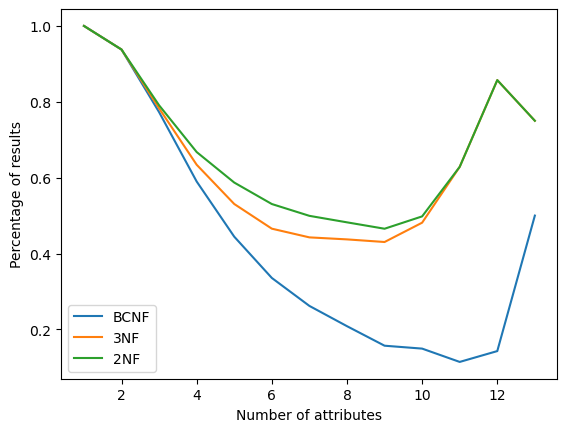

In [8]:
# Plotting the results
# The x-axis is the number of attributes
# The y-axis (in different colours) is the percentage of BCNF, 3NF, and 2NF results
# For each of rush result, the format returned by FDSampleRushResult.summarize(rush.get_results()) is as follows: {'num_bcnf': ..., 'num_3nf': ..., 'num_2nf': ..., 'total_time': ...}.
# The total number of results can be obtained by getting the length of rush.get_results()
fig, ax = plt.subplots()
ax.set_xlabel('Number of attributes')
ax.set_ylabel('Percentage of results')
ax.plot(range(1, 14), [FDSampleRushResult.summarize(r.get_results())['num_bcnf']/len(r.get_results()) for r in res], label='BCNF')
ax.plot(range(1, 14), [FDSampleRushResult.summarize(r.get_results())['num_3nf']/len(r.get_results()) for r in res], label='3NF')
ax.plot(range(1, 14), [FDSampleRushResult.summarize(r.get_results())['num_2nf']/len(r.get_results()) for r in res], label='2NF')

ax.legend()